<a href="https://colab.research.google.com/github/URPDataScience/URP_ML2/blob/master/ML2_Voice_Data_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Gender Recognition by Voice**

**Table of Content**

     1.  Introduction

     2.  Data

             2.1 Importing packages
             
             2.2 loading data set 
             
             2.3 data discribtion

     3.  Problem statement   

     4.  Data processing   

     5.  Exploratory Data Analysis  

     6.  Model evaluation

            6.1  K-Nearest Neighbors  

            6.2  Naive Bayes

            6.3  Random Forest

            6.4  XgBoost  Neural Network to build models

            6.5  Support Vector Machine

            6.6  Neural Network to build models

     7.   Accuracy results of different models
     
     8.  Interpretation           




**1. INTRODUCTION**

One of the most common means of communication in the world is through voice. In the real world, it is possible for a person to verify the gender of a person through voice. Voice is filled with lots of linguistic features. These voice features are considered as the voice prints to recognize the gender of a speaker. The recorded voice is considered as the input to the system, which then the system process to get voice features. Examine the input and compare it with the trained model, carry out calculations based on the algorithm used and gives the latest matching output. Gender recognition can be used along with various other applications.

Some are:

 For detecting feeling like male sad, female anger, etc.

 Differentiating audios and videos using tags.

 Spontaneous salutations.

 Helping personal assistants to answer questions with gender-specific results etc.

Gender Recognition by Voice and Speech Analysis

This project trains a computer program to identify a voice as male or female, based upon acoustic properties of the voice and speech. The model is trained on a dataset consisting of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R and then processed with artificial intelligence/machine learning algorithms to learn gender-specific traits for classifying the voice as male or female.

The best model achieves an accuracy of 100% on the training set and 89% on the test set.

Update: By narrowing the frequency range analyzed to 0hz-280hz (human vocal range), the best accuracy is boosted to 100%/99%.


An automatic speech recognition (ASR) system works by pattern matching digitized audio of spoken words against computer models (i.e., computer representations) of speech patterns to generate a text transcription. Speech recognition or more commonly known as automatic speech recognition (ASR), is the process of interpreting human speech in a computer. An ideal automatic speech recognition system would process speech audio into an error-free, word-for-word transcription of that speech.
Dataobtain from ASR is decoded by Driven Decoding Algorithm (DDA), which allows us to combine speech recognition systems, by guiding the data set with algorithms to get data in numerical form.

An ASR System is typically composed of the following components:


Digital representation for input (and a method of extracting it)

**Feature extraction component:** This identifies parts of the input containing speech and then transforms those parts into sequences of what is known as acoustic parameters.

**Data / corpus for training and testing:** This database is a collection of recorded speech enhanced with required annotations and transcriptions. This corpus has to be large enough and relevant enough to cover the variability of speech in a given use case.

**Acoustic models:** An acoustic model takes the waveform of speech and breaks it up into small fragments and predicts the most likely phonemes in the speech.

**Pronunciation models:** A pronunciation model takes sounds and ties them together to make words, i.e. it associates words with their phonetic representations.

**Language models:** A language model takes the words and ties them together to make sentences, i.e. it predicts the most likely sequence of words (or text strings) among several a set of text strings.

**Algorithms to search the hypothesis space efficiently (known as a decoder) : **This combines the predictions of acoustic and language models and outputs the most likely text string for a given speech file input.



**2        Data**

**2.1   Importing packages** 

In [1]:
## Importing packages      
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analys
### Import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
from subprocess import check_output
from __future__ import division, absolute_import, print_function

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**2.2     Importing the Dataset**

In [0]:
## Importing the Dataset
import pandas as pd
voice_data = pd.read_csv("https://raw.githubusercontent.com/banduguide/URP_ML2/master/gender_recognition_by_voice.csv")   # Importing training dataset using pd.read_csv

In [3]:
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
voice_data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [5]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

** 2.3 data discribtion**

The CSV file contains the following fields:

"meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx","label"

"label" corresponds to the gender classification of the sample. The remaining fields are acoustic properties, detailed below.

In addition to the pre-processed dataset, the raw voice samples used for training are included as.WAV files in a separate repository. The .WAV files are pre-processed in R to produce the above dataset.

Acoustic Properties Measured

The following acoustic properties of each voice are measured: 

•duration:  length of signal

•meanfreq:   mean frequency (in kHz)

•sd:  standard deviation of frequency

**•median:**   median frequency (in kHz)

**•Q25:**   first quantile (in kHz)

**•Q75:**   third quantile (in kHz)

**•IQR:**   interquantile range (in kHz)

**•skew:**   skewness (see note in specprop description)

**•kurt:**   kurtosis (see note in specprop description)

**•sp.ent:**   spectral entropy

**•sfm: **  spectral flatness

**•mode:**   mode frequency

**•centroid:**   frequency centroid (see specprop)

**•peakf: **  peak frequency (frequency with highest energy)

**•meanfun:**   average of fundamental frequency measured across acoustic signal

**•minfun: **  minimum fundamental frequency measured across acoustic signal

**•maxfun: **  maximum fundamental frequency measured across acoustic signal

**•meandom:**   average of dominant frequency measured across acoustic signal 

**•mindom:**   minimum of dominant frequency measured across acoustic signal

**•maxdom:  ** maximum of dominant frequency measured across acoustic signal 

**•dfrange:**   range of dominant frequency measured across acoustic signal

**•modindx:**   modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range




**3. PROBLEM STATEMENT**

Gender identification is considered to be one of the major problems in the field of signal processing. Formerly, this problem has been solved using various image classification techniques which typically includes information extraction from a set of images. However, gender classification using vocal features has recently been a topic of interest to a lot of researchers across the globe. A close scrutiny of some of the human vocal features reveals that classifying gender goes way beyond just the frequency and the pitch of a person. One of the most challenging problems faced in machine learning is feature selection or as is technically known as dimensionality reduction. A similar problem is faced while deciding gender-specific traits-which serve a significant purpose in classifying the gender of a person. 


The voice recordings are processed through AUTOMATIC SPEECH RECOGNITION (ASR) System to generate text/ word form of audio recorded data. In this data voice recordings are processed by appling voice specific parametrs. This is then processed through  Driven Decoding Algorithm (DDA). each recording is specified as male or female. Here we are getting preprocessed data and we have to check or predict the accuracy of the data using different models and algorithms.


# 4. Preprocessing
  
##       **label encoder and normalization**

Label column is in variable form. Our requrinment is to express these variables in numerical form for the further analysis. 

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
voice_data["label"] = le.fit_transform(voice_data["label"])
le.classes_

array(['female', 'male'], dtype=object)

In [0]:
voice_data[:]=preprocessing.MinMaxScaler().fit_transform(voice_data)
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,0.000000,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1.0
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,0.000000,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1.0
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,0.000000,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1.0
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,0.299565,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1.0
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,0.372362,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1.0


In [0]:
voice_data.describe

<bound method NDFrame.describe of       meanfreq        sd    median  ...   dfrange   modindx  label
0     0.096419  0.473409  0.084125  ...  0.000000  0.000000    1.0
1     0.125828  0.505075  0.116900  ...  0.002146  0.056449    1.0
2     0.179222  0.675536  0.102873  ...  0.000358  0.049885    1.0
3     0.528261  0.554611  0.587559  ...  0.025393  0.265043    1.0
4     0.452195  0.627209  0.454272  ...  0.250715  0.223380    1.0
...        ...       ...       ...  ...       ...       ...    ...
3163  0.436911  0.684871  0.570361  ...  0.192418  0.173674    0.0
3164  0.362946  0.731172  0.262871  ...  0.166667  0.298053    0.0
3165  0.484949  0.799042  0.690337  ...  0.134120  0.208885    0.0
3166  0.492516  0.745692  0.695311  ...  0.164163  0.333559    0.0
3167  0.595700  0.768964  0.687590  ...  0.025036  0.375386    0.0

[3168 rows x 21 columns]>

In [0]:
voice_data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

# 5. **Exploratory Data Analysis**

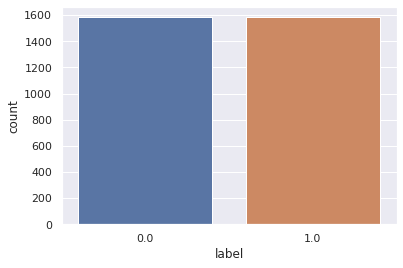

In [0]:
import seaborn as sns
sns.countplot(x="label",data=voice_data)

5.2  Heatmap

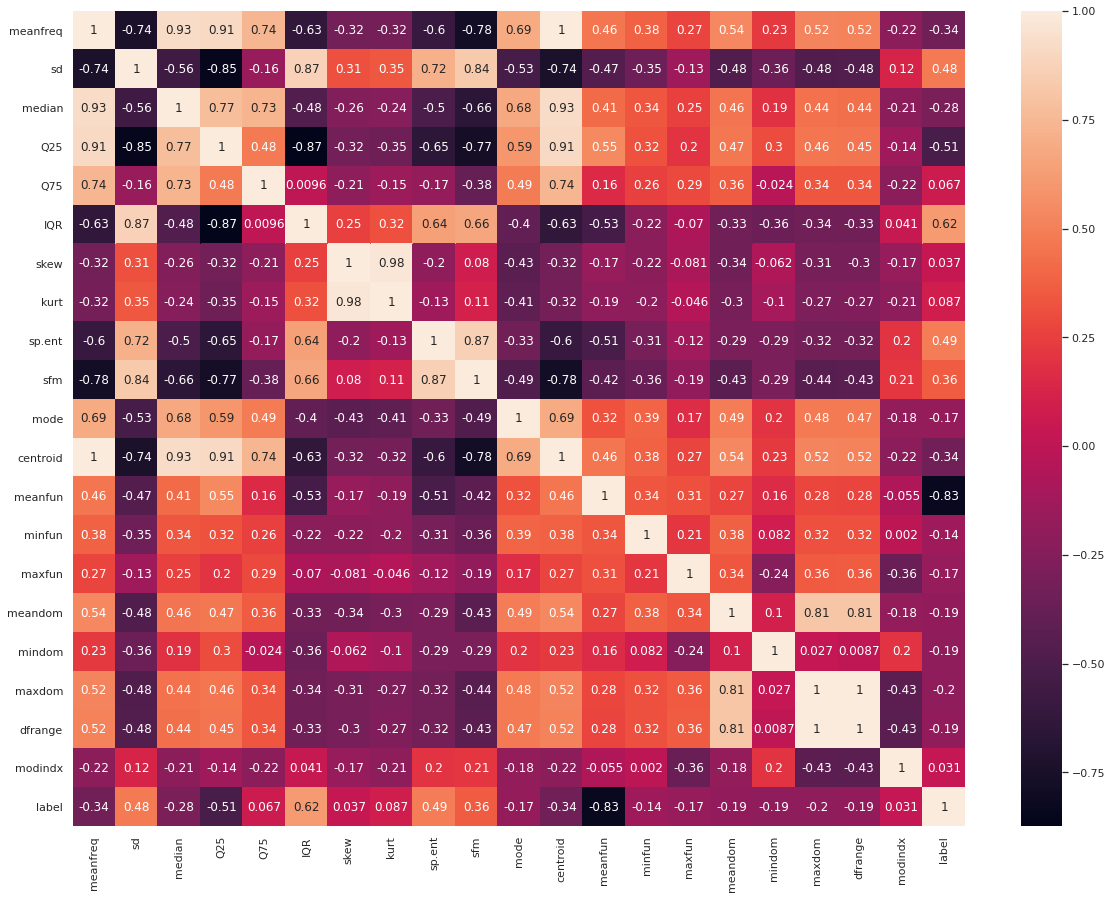

In [0]:
# Seaborn Heatmap that show coorelations 
import seaborn as sns
plt.figure(figsize = (20,15))
sns.heatmap(voice_data.corr(),annot=True)

In [0]:

voice_data.corr().label.sort_values()

meanfun    -0.833921
Q25        -0.511455
meanfreq   -0.337415
centroid   -0.337415
median     -0.283919
maxdom     -0.195657
mindom     -0.194974
dfrange    -0.192213
meandom    -0.191067
mode       -0.171775
maxfun     -0.166461
minfun     -0.136692
modindx     0.030801
skew        0.036627
Q75         0.066906
kurt        0.087195
sfm         0.357499
sd          0.479539
sp.ent      0.490552
IQR         0.618916
label       1.000000
Name: label, dtype: float64

 From above results it is clear that some parameters are in negative correlation with our target column that is label.

 Parameters with possitive correlation with label :

modindx :     0.030801

skew :        0.036627

Q75  :       0.066906

kurt  :      0.087195

sfm   :      0.357499

sd    :      0.479539

sp.ent  :     0.490552

IQR   :      0.618916

**5.3  scatter plot**

In [0]:
for a in voice_data.columns:
    for b in voice_data.columns:
        sns.FacetGrid(voice_data, hue="label", size=5) \
       .map(plt.scatter, a, b) \
       .add_legend()

By the scatter plot some parameters shows significant difference in plot pattern of male and female. so,it make difference in male female plots. 
Modindx,skew,Q75,kurt,sfm,sd,sp.ent,IQR shows deferent scater pattern of male and female.

## **5.4  Matplot**

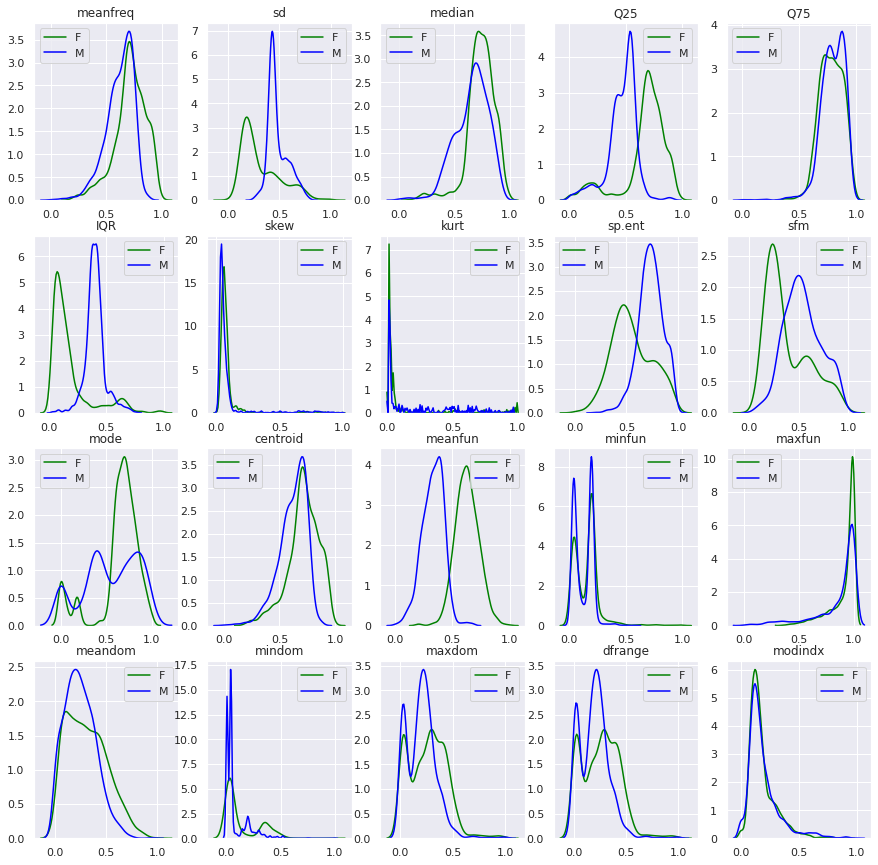

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(4,5,figsize=(15,15))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(voice_data.columns[i-1])
    sns.kdeplot(voice_data.loc[voice_data['label'] == 0, voice_data.columns[i-1]], color= 'green', label='F')
    sns.kdeplot(voice_data.loc[voice_data['label'] == 1, voice_data.columns[i-1]], color= 'blue', label='M')

At first glance, most significant features are Q25, IQR and meanfun. We will build models by using the 20 features and the 3 distinct features.

Using K-Nearest Neighbors, Naive Bayes, Decision Tree, Random Forest, XgBoost, Support Vector Machine, Neural Network to build models

# **6.   Model evaluation**

          6.1  K-Nearest Neighbors 

In [0]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network
import xgboost

In [0]:
# use the list to select a subset of the original DataFrame-+
feature_cols = ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']                # create a Python list of feature names
x = voice_data[feature_cols]

In [0]:
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(3168, 20)


In [0]:
y = voice_data['label']
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: label, dtype: float64

In [0]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(3168,)


In [0]:
# Split the data
train,test = train_test_split(voice_data, test_size=0.3)

In [0]:
train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1755,0.706149,0.208100,0.698777,0.702397,0.713624,0.080329,0.088637,0.009725,0.456898,0.316568,0.619625,0.706149,0.655359,0.039587,0.857144,0.337271,0.350538,0.288063,0.281116,0.273095,0.0
2509,0.773472,0.238221,0.748687,0.702946,0.827425,0.190139,0.048407,0.003774,0.629258,0.281455,0.707071,0.773472,0.635641,0.196478,0.999749,0.264703,0.040860,0.270908,0.270386,0.092591,0.0
317,0.555580,0.445700,0.575999,0.417268,0.709400,0.372699,0.072282,0.008316,0.765753,0.599947,0.368343,0.555580,0.238471,0.122975,0.676791,0.341922,0.225806,0.149080,0.144626,0.573564,1.0
698,0.579436,0.452393,0.655330,0.420329,0.745084,0.404128,0.061972,0.005227,0.705262,0.476723,0.379253,0.579436,0.217409,0.210936,0.124458,0.089022,0.193548,0.038286,0.034424,0.460353,1.0
1531,0.453467,0.632865,0.421505,0.406196,0.741362,0.415213,0.252891,0.115370,0.655326,0.527502,0.000000,0.453467,0.252841,0.031708,0.880415,0.007634,0.006452,0.005361,0.005365,0.424679,1.0


In [0]:
test.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1571,0.562774,0.421494,0.504727,0.442508,0.748440,0.384322,0.080971,0.010133,0.745460,0.515023,0.395116,0.562774,0.296347,0.184692,0.766967,0.249143,0.000000,0.182586,0.182851,0.285997,1.0
1650,0.362907,0.689630,0.319862,0.161094,0.648541,0.580029,0.033703,0.002096,0.935755,0.901372,0.122974,0.362907,0.699076,0.084904,0.857144,0.092137,0.023656,0.033595,0.033262,0.542672,0.0
1790,0.598387,0.370846,0.652964,0.655278,0.640223,0.058128,0.098782,0.012042,0.595367,0.502841,0.605769,0.598387,0.654168,0.037949,0.812749,0.283675,0.350538,0.290922,0.283977,0.216899,0.0
832,0.617109,0.476779,0.725256,0.431555,0.749322,0.396565,0.051125,0.003713,0.803848,0.698219,0.696028,0.617109,0.359862,0.192118,0.999749,0.322710,0.040860,0.342745,0.342275,0.059366,1.0
2712,0.819653,0.283117,0.816577,0.727355,0.927256,0.261589,0.037045,0.002271,0.615499,0.217956,0.658537,0.819653,0.593684,0.199978,0.929285,0.645071,0.040860,0.427448,0.427039,0.091765,0.0


In [0]:
x_train = train.iloc[:, :-1]
y_train = train["label"]
x_test = test.iloc[:, :-1]
y_test = test["label"]

In [0]:
x_train3 = train[["meanfun","IQR","Q25"]]
y_train3 = train["label"]
x_test3 = test[["meanfun","IQR","Q25"]]
y_test3 = test["label"]


In [0]:
x_test.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
1571,0.562774,0.421494,0.504727,0.442508,0.748440,0.384322,0.080971,0.010133,0.745460,0.515023,0.395116,0.562774,0.296347,0.184692,0.766967,0.249143,0.000000,0.182586,0.182851,0.285997
1650,0.362907,0.689630,0.319862,0.161094,0.648541,0.580029,0.033703,0.002096,0.935755,0.901372,0.122974,0.362907,0.699076,0.084904,0.857144,0.092137,0.023656,0.033595,0.033262,0.542672
1790,0.598387,0.370846,0.652964,0.655278,0.640223,0.058128,0.098782,0.012042,0.595367,0.502841,0.605769,0.598387,0.654168,0.037949,0.812749,0.283675,0.350538,0.290922,0.283977,0.216899
832,0.617109,0.476779,0.725256,0.431555,0.749322,0.396565,0.051125,0.003713,0.803848,0.698219,0.696028,0.617109,0.359862,0.192118,0.999749,0.322710,0.040860,0.342745,0.342275,0.059366
2712,0.819653,0.283117,0.816577,0.727355,0.927256,0.261589,0.037045,0.002271,0.615499,0.217956,0.658537,0.819653,0.593684,0.199978,0.929285,0.645071,0.040860,0.427448,0.427039,0.091765


In [0]:
x_train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
1755,0.706149,0.208100,0.698777,0.702397,0.713624,0.080329,0.088637,0.009725,0.456898,0.316568,0.619625,0.706149,0.655359,0.039587,0.857144,0.337271,0.350538,0.288063,0.281116,0.273095
2509,0.773472,0.238221,0.748687,0.702946,0.827425,0.190139,0.048407,0.003774,0.629258,0.281455,0.707071,0.773472,0.635641,0.196478,0.999749,0.264703,0.040860,0.270908,0.270386,0.092591
317,0.555580,0.445700,0.575999,0.417268,0.709400,0.372699,0.072282,0.008316,0.765753,0.599947,0.368343,0.555580,0.238471,0.122975,0.676791,0.341922,0.225806,0.149080,0.144626,0.573564
698,0.579436,0.452393,0.655330,0.420329,0.745084,0.404128,0.061972,0.005227,0.705262,0.476723,0.379253,0.579436,0.217409,0.210936,0.124458,0.089022,0.193548,0.038286,0.034424,0.460353
1531,0.453467,0.632865,0.421505,0.406196,0.741362,0.415213,0.252891,0.115370,0.655326,0.527502,0.000000,0.453467,0.252841,0.031708,0.880415,0.007634,0.006452,0.005361,0.005365,0.424679


In [0]:
y_test.head()

1571    1.0
1650    0.0
1790    0.0
832     1.0
2712    0.0
Name: label, dtype: float64

In [0]:
y_train.head()

1755    0.0
2509    0.0
317     1.0
698     1.0
1531    1.0
Name: label, dtype: float64

In [0]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [0]:
from sklearn import metrics

In [0]:
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
x_test.shape

(951, 20)

In [0]:
y_test.iloc[0]

1.0

In [0]:
x_test.iloc[0]

meanfreq    0.562774
sd          0.421494
median      0.504727
Q25         0.442508
Q75         0.748440
IQR         0.384322
skew        0.080971
kurt        0.010133
sp.ent      0.745460
sfm         0.515023
mode        0.395116
centroid    0.562774
meanfun     0.296347
minfun      0.184692
maxfun      0.766967
meandom     0.249143
mindom      0.000000
maxdom      0.182586
dfrange     0.182851
modindx     0.285997
Name: 1571, dtype: float64

In [0]:
linreg.predict([x_test.iloc[5]])

array([0.03750683])

In [0]:
y_test.iloc[20]

1.0

In [0]:
y_pred = linreg.predict([x_test.iloc[5]])

In [0]:
y_pred

array([0.03750683])

In [0]:
x_test.iloc[0]

meanfreq    0.562774
sd          0.421494
median      0.504727
Q25         0.442508
Q75         0.748440
IQR         0.384322
skew        0.080971
kurt        0.010133
sp.ent      0.745460
sfm         0.515023
mode        0.395116
centroid    0.562774
meanfun     0.296347
minfun      0.184692
maxfun      0.766967
meandom     0.249143
mindom      0.000000
maxdom      0.182586
dfrange     0.182851
modindx     0.285997
Name: 1571, dtype: float64

In [0]:
linreg.predict([x_test.iloc[1]])


array([0.12374359])

In [0]:
y_pred - y_test.iloc[1]

array([0.03750683])

In [0]:
x_test.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
1571,0.562774,0.421494,0.504727,0.442508,0.748440,0.384322,0.080971,0.010133,0.745460,0.515023,0.395116,0.562774,0.296347,0.184692,0.766967,0.249143,0.000000,0.182586,0.182851,0.285997
1650,0.362907,0.689630,0.319862,0.161094,0.648541,0.580029,0.033703,0.002096,0.935755,0.901372,0.122974,0.362907,0.699076,0.084904,0.857144,0.092137,0.023656,0.033595,0.033262,0.542672
1790,0.598387,0.370846,0.652964,0.655278,0.640223,0.058128,0.098782,0.012042,0.595367,0.502841,0.605769,0.598387,0.654168,0.037949,0.812749,0.283675,0.350538,0.290922,0.283977,0.216899
832,0.617109,0.476779,0.725256,0.431555,0.749322,0.396565,0.051125,0.003713,0.803848,0.698219,0.696028,0.617109,0.359862,0.192118,0.999749,0.322710,0.040860,0.342745,0.342275,0.059366
2712,0.819653,0.283117,0.816577,0.727355,0.927256,0.261589,0.037045,0.002271,0.615499,0.217956,0.658537,0.819653,0.593684,0.199978,0.929285,0.645071,0.040860,0.427448,0.427039,0.091765


In [0]:
linreg.predict(x_test) 

array([ 9.61923925e-01,  1.23743588e-01, -2.25220978e-01,  7.95818102e-01,
        3.34378497e-01,  3.75068269e-02,  7.39893130e-02,  1.83247689e-01,
        2.28155019e-01,  1.06895619e+00,  1.29427812e-01,  5.62136084e-01,
       -7.01304430e-02,  9.42426780e-01,  4.07673387e-01,  8.37193622e-01,
       -7.41633135e-02,  3.30376926e-01, -1.22845232e-01, -3.01469382e-01,
        9.00740856e-01,  4.13545732e-01,  1.07984493e+00,  9.57459634e-01,
        8.16383469e-01, -8.83101084e-03,  1.02382840e+00,  1.15140272e+00,
       -1.75774941e-01,  8.29524901e-01,  3.67490954e-01,  1.78251117e-01,
       -1.26084667e-01,  8.61309578e-01,  2.84462220e-01,  2.94015823e-01,
        3.72328954e-01,  1.56704870e-01,  2.59464386e-01,  1.08483927e+00,
        1.04994034e+00, -8.97756038e-03,  1.02476073e+00,  9.64794494e-01,
       -1.59380437e-01,  1.14257793e-01, -7.49132734e-02,  7.51695818e-01,
        1.06901017e+00, -3.35927685e-02,  8.38841803e-01, -2.47343925e-01,
        8.75585286e-01,  

In [0]:
y_pred_test = linreg.predict(x_test) 
RMSE_test = (metrics.mean_squared_error(y_test,y_pred_test))                          # compute the RMSE of our predictions
print('RMSE for the test set is {}'.format(RMSE_test))

RMSE for the test set is 0.053878866303141745


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(pd.DataFrame(y_test))
scaler.transform(pd.DataFrame(y_test))

array([[ 0.97404851],
       [-1.02664292],
       [-1.02664292],
       [ 0.97404851],
       [-1.02664292],
       [-1.02664292],
       [-1.02664292],
       [-1.02664292],
       [-1.02664292],
       [ 0.97404851],
       [-1.02664292],
       [-1.02664292],
       [-1.02664292],
       [ 0.97404851],
       [-1.02664292],
       [ 0.97404851],
       [-1.02664292],
       [ 0.97404851],
       [-1.02664292],
       [-1.02664292],
       [ 0.97404851],
       [-1.02664292],
       [ 0.97404851],
       [ 0.97404851],
       [ 0.97404851],
       [-1.02664292],
       [ 0.97404851],
       [ 0.97404851],
       [-1.02664292],
       [ 0.97404851],
       [-1.02664292],
       [ 0.97404851],
       [-1.02664292],
       [ 0.97404851],
       [ 0.97404851],
       [-1.02664292],
       [-1.02664292],
       [-1.02664292],
       [-1.02664292],
       [ 0.97404851],
       [ 0.97404851],
       [-1.02664292],
       [ 0.97404851],
       [ 0.97404851],
       [-1.02664292],
       [-1

In [0]:
y_pred

array([0.03750683])

In [0]:
y_test

1571    1.0
1650    0.0
1790    0.0
832     1.0
2712    0.0
       ... 
561     1.0
1831    0.0
3049    0.0
3079    0.0
373     1.0
Name: label, Length: 951, dtype: float64

In [0]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [0]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(normalize=False, fit_intercept=False)
linreg.fit(x_train, y_train) 
y_pred_test = linreg.predict(x_test)   
# make predictions on the testing set
RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test)) # compute the RMSE of our predictions
print('RMSE for the test set is {}'.format(RMSE_test))

RMSE for the test set is 0.053825575280884594


In [0]:
print('Intercept:',linreg.intercept_)                                           # print the intercept 
print('Coefficients:',linreg.coef_)

Intercept: 0.0
Coefficients: [-9.18691859e+00  3.95670767e-01 -3.43148956e-01  3.14841009e+04
 -2.93690813e+04  3.02806571e+04 -1.08003150e+00  5.51501156e-01
 -1.99622598e-01 -3.34302210e-01  1.64246160e-01  9.11084635e+00
 -2.28126007e+00  5.47498900e-01  1.50462171e-01 -1.95459147e-01
 -5.55926529e+05  2.67609903e+07 -2.67418617e+07  9.47875254e-03]


In [0]:
linreg.intercept_

0.0

In [0]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)

In [0]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 0.0
meanfreq -9.186918592726133
sd 0.39567076733390527
median -0.34314895607571133
Q25 31484.100856011137
Q75 -29369.081289813603
IQR 30280.65712105997
skew -1.0800315047967353
kurt 0.5515011558197174
sp.ent -0.19962259848638597
sfm -0.33430221023045176
mode 0.1642461599805129
centroid 9.110846349449584
meanfun -2.2812600731743466
minfun 0.5474988996307852
maxfun 0.15046217079639454
meandom -0.1954591467235949
mindom -555926.5288842798
maxdom 26760990.34361644
dfrange -26741861.702473905
modindx 0.009478752543611302


In [0]:
y_pred_train = linreg.predict(x_train)

In [0]:
y_pred_test = linreg.predict(x_test)

In [0]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [0]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.1629499672175098
MAE for test set is 0.16799493592052908


Computing the RMSE for our Sales predictions

In [0]:
MSE_train = metrics.mean_squared_error( y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [0]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.04672268330714611
MSE for test set is 0.053825575280884594


In [0]:
Yhat = linreg.predict(x_train)
SS_Residual = sum((y_train-Yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8130854988267812 0.8113831809654586


K-Nearest Neighbors
Using neighbors. KNeighborsClassifier() to build the model.

In [0]:
def classify(model,x_train,y_train,x_test,y_test):
    from sklearn.metrics import classification_report
    target_names = ['female', 'male']
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

K-Nearest Neighbor using neighbors.KNeighborsClassifier() to build the model.

In [0]:
def knn_error(k,x_train,y_train,x_test,y_test):
    error_rate = []
    K=range(1,k)
    for i in K:
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at k=%s." % (error_rate[kloc], K[kloc]))

    plt.plot(K, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    return K[kloc]


Lowest error is 0.024185068349106203 occurs at k=3.


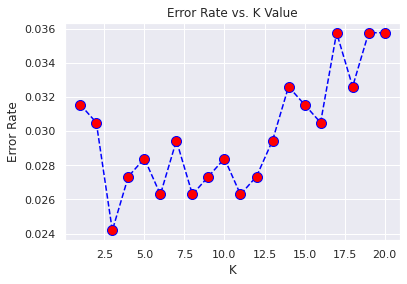

In [0]:
k=knn_error(21,x_train,y_train,x_test,y_test)

In [0]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9741    0.9762    0.9752       463
        male     0.9774    0.9754    0.9764       488

    accuracy                         0.9758       951
   macro avg     0.9758    0.9758    0.9758       951
weighted avg     0.9758    0.9758    0.9758       951



Lowest error is 0.026288117770767613 occurs at k=5.


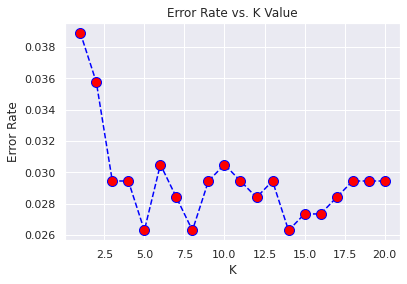

In [0]:
k=knn_error(21,x_train3,y_train3,x_test3,y_test3)

In [0]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9698    0.9719    0.9709       463
        male     0.9733    0.9713    0.9723       488

    accuracy                         0.9716       951
   macro avg     0.9716    0.9716    0.9716       951
weighted avg     0.9716    0.9716    0.9716       951



**6.2   Naive Bayes**

Using naive_bayes.GaussianNB() to build the model.

In [0]:
model=naive_bayes.GaussianNB()
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9091    0.8855    0.8972       463
        male     0.8940    0.9160    0.9049       488

    accuracy                         0.9012       951
   macro avg     0.9015    0.9008    0.9010       951
weighted avg     0.9013    0.9012    0.9011       951



In [0]:
model=naive_bayes.GaussianNB()
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9675    0.9633    0.9654       463
        male     0.9653    0.9693    0.9673       488

    accuracy                         0.9664       951
   macro avg     0.9664    0.9663    0.9663       951
weighted avg     0.9664    0.9664    0.9663       951



model=naive_bayes.GaussianNB()
classify(model,x_train3,y_train3,x_test3,y_test3)

In [0]:
#Find the best parameter to prune the tree
def dt_error(n,x_train,y_train,x_test,y_test):
    nodes = range(2, n)
    error_rate = []
    for k in nodes:
        model = tree.DecisionTreeClassifier(max_leaf_nodes=k)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[kloc], nodes[kloc]))
    plt.plot(nodes, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.xlabel('Tree Size')
    plt.ylabel('Cross-Validated MSE')
    plt.show()
    return nodes[kloc]

Lowest error is 0.031545741324921134 occurs at n=8.


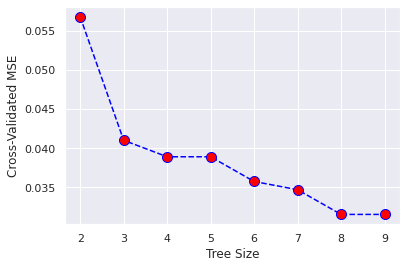

In [0]:
n=dt_error(10,x_train,y_train,x_test,y_test)

In [0]:
#prune tree
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
classify(pruned_tree,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9597    0.9762    0.9679       463
        male     0.9771    0.9611    0.9690       488

    accuracy                         0.9685       951
   macro avg     0.9684    0.9687    0.9684       951
weighted avg     0.9686    0.9685    0.9685       951



Lowest error is 0.030494216614090432 occurs at n=10.


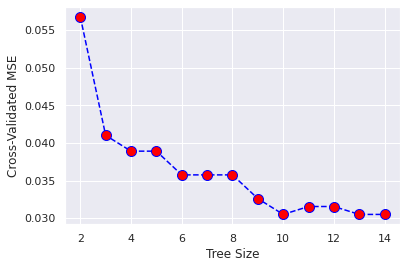

In [0]:
n=dt_error(15,x_train3,y_train3,x_test3,y_test3)

In [0]:
#prune tree
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
classify(pruned_tree,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9637    0.9741    0.9689       463
        male     0.9752    0.9652    0.9701       488

    accuracy                         0.9695       951
   macro avg     0.9694    0.9696    0.9695       951
weighted avg     0.9696    0.9695    0.9695       951



**6.3   Random Forest**

Using ensemble.RandomForestClassifier() to build the model.

In [0]:
def rf_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    e=range(1,n,20)
    for i in e:
        model = ensemble.RandomForestClassifier(n_estimators = i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    nloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[nloc], e[nloc]))

    plt.plot(e, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. n Value')
    plt.xlabel('n')
    plt.ylabel('Error Rate')
    plt.show()
    return e[nloc]

Lowest error is 0.022082018927444796 occurs at n=81.


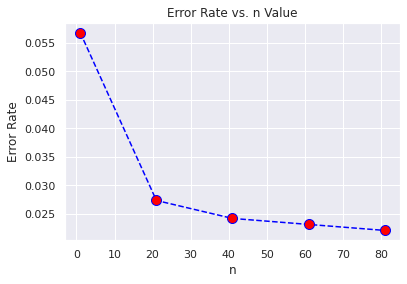

In [0]:
e=rf_error(100,x_train,y_train,x_test,y_test)

In [0]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9701    0.9827    0.9764       463
        male     0.9834    0.9713    0.9773       488

    accuracy                         0.9769       951
   macro avg     0.9768    0.9770    0.9769       951
weighted avg     0.9770    0.9769    0.9769       951



In [0]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9657    0.9719    0.9688       463
        male     0.9732    0.9672    0.9702       488

    accuracy                         0.9695       951
   macro avg     0.9694    0.9696    0.9695       951
weighted avg     0.9695    0.9695    0.9695       951



**6.4   XgBoost**


Using xgboost.XGBClassifier() to build the model.

In [0]:
model = xgboost.XGBClassifier()
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9722    0.9827    0.9774       463
        male     0.9834    0.9734    0.9784       488

    accuracy                         0.9779       951
   macro avg     0.9778    0.9780    0.9779       951
weighted avg     0.9780    0.9779    0.9779       951



In [0]:
model = xgboost.XGBClassifier()
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9574    0.9698    0.9635       463
        male     0.9710    0.9590    0.9649       488

    accuracy                         0.9642       951
   macro avg     0.9642    0.9644    0.9642       951
weighted avg     0.9643    0.9642    0.9643       951



**6.5   Support Vector Machine**


Using svm.SVC() to build the model.

In [0]:
def svm_kernel(x_train,y_train,x_test,y_test):
    rate=[]
    kernel=['rbf','poly','linear']
    for i in kernel:
        model=svm.SVC(kernel=i).fit(x_train,y_train)
        y_pred=model.predict(x_train)
        print(i, ' in-sample accuracy in SVM: ', accuracy_score(y_train,y_pred))
        y_pred=model.predict(x_test)
        print(i, ' out-of-sample accuracy in SVM: ', accuracy_score(y_test,y_pred))
        rate.append(accuracy_score(y_test,y_pred))
    nloc = rate.index(max(rate))
    print("Highest accuracy is %s occurs at %s kernel." % (rate[nloc], kernel[nloc]))
    return kernel[nloc]

In [0]:
def svm_error(k,C,x_train,y_train,x_test,y_test):
    error_rate = []
    C=range(1,C)
    for i in C:
        model=svm.SVC(kernel=k,C=i).fit(x_train,y_train)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    cloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[cloc], C[cloc]))

    plt.plot(C, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. C Value')
    plt.xlabel('C')
    plt.ylabel('Error Rate')
    plt.show()
    return C[cloc]

In [0]:
k=svm_kernel(x_train,y_train,x_test,y_test)

rbf  in-sample accuracy in SVM:  0.9828597203428056
rbf  out-of-sample accuracy in SVM:  0.9716088328075709
poly  in-sample accuracy in SVM:  0.9851150202976996
poly  out-of-sample accuracy in SVM:  0.9716088328075709
linear  in-sample accuracy in SVM:  0.9788001804239964
linear  out-of-sample accuracy in SVM:  0.9652996845425867
Highest accuracy is 0.9716088328075709 occurs at rbf kernel.


Lowest error is 0.025236593059936908 occurs at C=9.


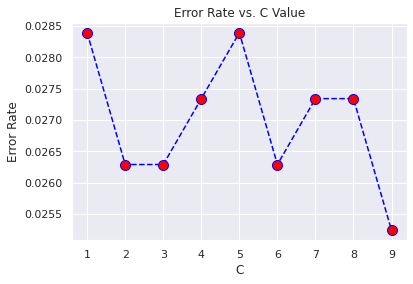

In [0]:
c=svm_error(k,10,x_train,y_train,x_test,y_test)


In [0]:
model=svm.SVC(kernel=k,C=c)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9700    0.9784    0.9742       463
        male     0.9793    0.9713    0.9753       488

    accuracy                         0.9748       951
   macro avg     0.9747    0.9749    0.9748       951
weighted avg     0.9748    0.9748    0.9748       951



In [0]:
k=svm_kernel(x_train3,y_train3,x_test3,y_test3)

rbf  in-sample accuracy in SVM:  0.972936400541272
rbf  out-of-sample accuracy in SVM:  0.9684542586750788
poly  in-sample accuracy in SVM:  0.9738385205232296
poly  out-of-sample accuracy in SVM:  0.9631966351209253
linear  in-sample accuracy in SVM:  0.9693279206134416
linear  out-of-sample accuracy in SVM:  0.9600420609884333
Highest accuracy is 0.9684542586750788 occurs at rbf kernel.


Lowest error is 0.027339642481598318 occurs at C=4.


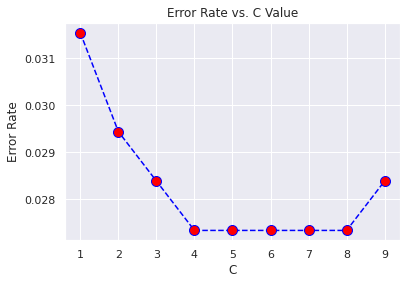

In [0]:
c=svm_error(k,10,x_train3,y_train3,x_test3,y_test3)

In [0]:
model=svm.SVC(kernel=k,C=c)
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9679    0.9762    0.9720       463
        male     0.9773    0.9693    0.9733       488

    accuracy                         0.9727       951
   macro avg     0.9726    0.9728    0.9726       951
weighted avg     0.9727    0.9727    0.9727       951



**6.6  Neural Network**


Using neural_network.MLPClassifier to build the model.

In [0]:
def nn_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=range(1,n)
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=i,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[kloc], hidden_layer[kloc]))

    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Error Rate')
    plt.show()
    return hidden_layer[kloc]


Lowest error is 0.030494216614090432 occurs at C=2.


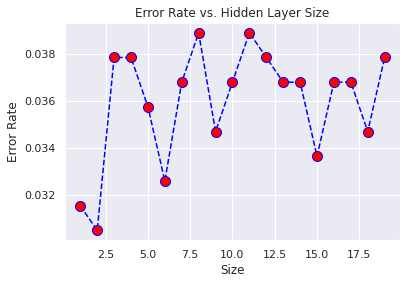

In [0]:
h=nn_error(20,x_train,y_train,x_test,y_test)

In [0]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9617    0.9762    0.9689       463
        male     0.9771    0.9631    0.9701       488

    accuracy                         0.9695       951
   macro avg     0.9694    0.9697    0.9695       951
weighted avg     0.9696    0.9695    0.9695       951



Lowest error is 0.03890641430073607 occurs at C=7.


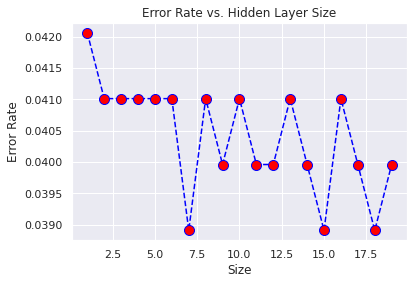

In [0]:
h=nn_error(20,x_train3,y_train3,x_test3,y_test3)

In [0]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9671    0.9525    0.9597       463
        male     0.9556    0.9693    0.9624       488

    accuracy                         0.9611       951
   macro avg     0.9613    0.9609    0.9610       951
weighted avg     0.9612    0.9611    0.9611       951



### **7.   Accuracy results of different model**





percentage accuracy of different models

1.  K-Nearest Neighbors   :  98.42%

2.  Naive Bayes   :  97.48%

3. Random Forest  :  97.34%

5. XgBoost         :  97.27%

6. Support Vector Machine  98.21%

8. Neural Network to build models    : 96.95%




We can see that the highest accuracy is 98.42% which is made by K-Nearest Neighbours.

# **8.     Interpretation:**

**for this data set 'K-Nearest Neighbours' is the model giving highest accuracy.**

This type of analysis is playing significant role for varity of domain.

Effective applications of ASR systems useful for industries. Presently ASR systems find a wide variety of applications in the following domains: 

• Medical Assistance 

• Industrial Robotics 

• Forensic and Law enforcement 

• Defence & Aviation 

• Telecommunications Industry

• Home Automation and security Access Control 

• I.T. and Consumer Electronics 
